# Thorlabs Aspheric Lens

The original asheric glass lens using the our Cartridge devices has been discontinued. We pay a higher price to get them made as "specials".

The original lens was Thorlabs# 352440-B. This has been superceded by the # 355440-B. The new version is symmetric (so it doesn't matter which way round you mount it). Annoyingly, the docs for this new lens are a little ambiguous in terms of the focal position. They indicate that the working distances given are to the "device window" rather than to a point source/focus.

The new lenses are £42 ea. 

# Aspheric Lens Formula

The lens surface sag for an aspheric is usually given in terms coefficients according to the following formula:

$$z = \frac{y^2}{R\left(1 + \sqrt{1-\frac{(1+k)y^2}{R^2}}\right)} + A_2 y^2 + A_4 y^4 + A_6 y^6 + A_8 y^8 + A_{10} y^{10}$$

$y$ is the distance from the optical axis.

This is a generalisation of a conic surface, where all the $A_n$ coefficients would be zero. If, additionally, $k$ is zero, the surface is a sphere.

For the 355440-B lens, the coefficients are:

|   | R | k | A2 | A4 | A6 | A8 | A10 |
|--:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| S1 | -3.200655 | -4.321649 | 0.0 | -5.521153E-3 | 1.981378E-3 | -4.782553E-4 | 7.328134E-5 |

The second face has the same coefficients but with inverted sign.


# Conic Sections

The surface of revolution of a conic section can be written as:

$$ \left(\frac{R}{\beta} - z \right)^2 + \frac{y^2}{\beta} = \frac{R^2}{\beta^2} $$

where $\beta = 1 + k$ and $k$ is the so-called "conic constant".

In [2]:
import sympy
from sympy import Eq
from sympy import init_session

init_session()

IPython console for SymPy 1.6.2 (Python 3.7.9-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.2/



In [38]:
R, r, beta = symbols("R r beta")

e1 = (R- beta*z)**2 + beta*r**2 - R**2
e1


In [39]:
ax, ay, az, dx, dy, dz = symbols("a_x a_y a_z d_x d_y d_z")

e2 = e1.subs(r**2, (ax + alpha*dx)**2 + (ay + alpha*dy)**2)
e3 = e2.subs(z, az+alpha*dz)
e3

In [44]:
e4 =collect(expand(e3), alpha)
e4

In [45]:
print_python(e4)

R = Symbol('R')
a_z = Symbol('a_z')
beta = Symbol('beta')
a_x = Symbol('a_x')
a_y = Symbol('a_y')
alpha = Symbol('alpha')
d_z = Symbol('d_z')
d_x = Symbol('d_x')
d_y = Symbol('d_y')
e = -2*R*a_z*beta + a_x**2*beta + a_y**2*beta + a_z**2*beta**2 + alpha**2*(beta**2*d_z**2 + beta*d_x**2 + beta*d_y**2) + alpha*(-2*R*beta*d_z + 2*a_x*beta*d_x + 2*a_y*beta*d_y + 2*a_z*beta**2*d_z)


Now look at evaluating the normal vector. We do this by taking the gradient of the implicit form of the surface.

In [46]:
e5 = (R-beta*z)**2 + beta*y**2 - R**2
e5

In [47]:
e6 = diff(e5,z)
e7 = diff(e5,y)
e6,e7

## Checking the equation for a spherical surface

In [1]:
from matplotlib import pyplot as pp
import numpy as np

<IPython.core.display.Javascript object>


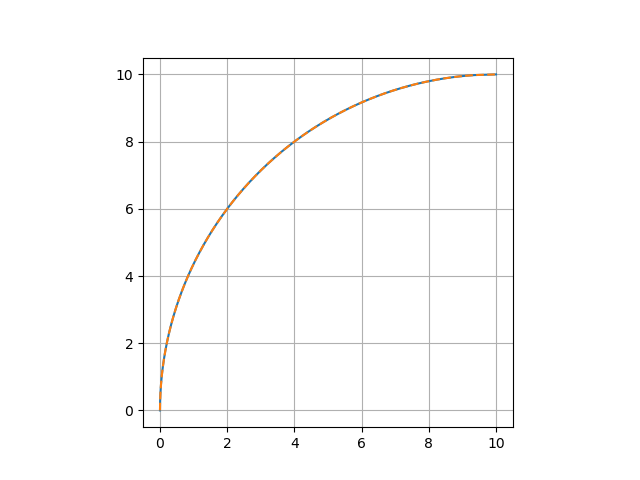

In [13]:
%matplotlib notebook

R = 10.0
y = np.linspace(0,R,512)

z = R*(1 - np.sqrt(1-(y**2)/(R**2)))

ax=pp.gca()
ax.set_aspect("equal")
pp.plot(z,y)
pp.grid(True)

z2 = (y**2)/( R * ( 1 + np.sqrt(1-(y**2)/(R**2))) )

pp.plot(z2,y, '--')

<IPython.core.display.Javascript object>


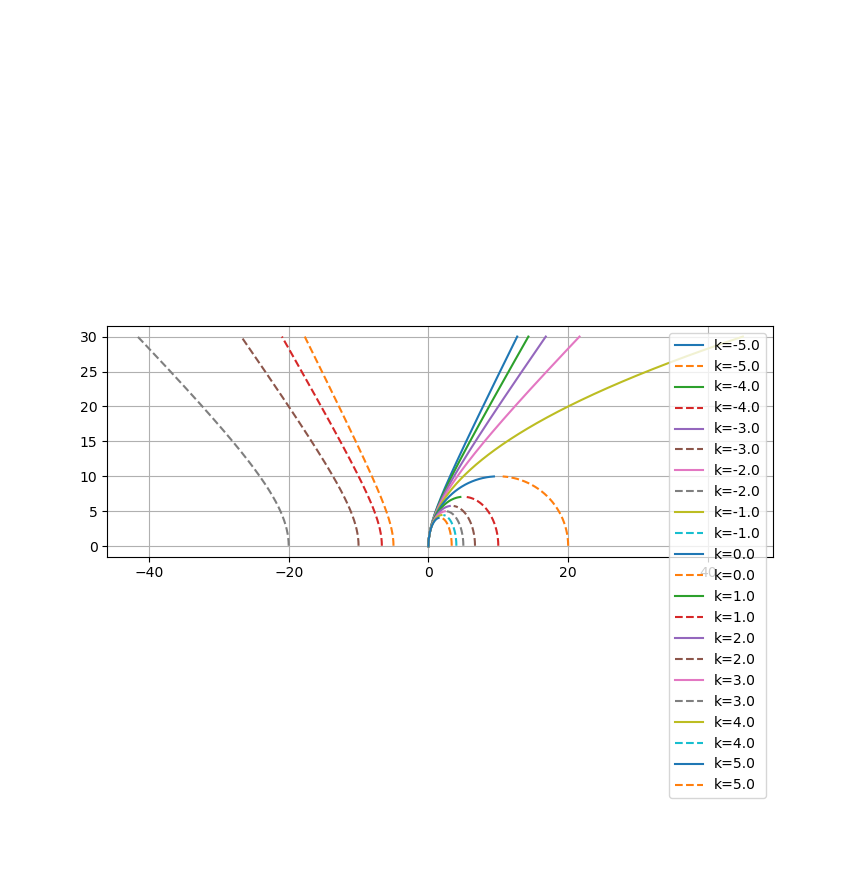

<ipython-input-84-f6f35a24e588>:15: RuntimeWarning: invalid value encountered in true_divide
  z = (y**2)/( R * ( 1 - np.sqrt(1-(1+k)*(y**2)/(R**2))) )
<ipython-input-84-f6f35a24e588>:15: RuntimeWarning: invalid value encountered in true_divide
  z = (y**2)/( R * ( 1 - np.sqrt(1-(1+k)*(y**2)/(R**2))) )
<ipython-input-84-f6f35a24e588>:15: RuntimeWarning: invalid value encountered in true_divide
  z = (y**2)/( R * ( 1 - np.sqrt(1-(1+k)*(y**2)/(R**2))) )
<ipython-input-84-f6f35a24e588>:15: RuntimeWarning: invalid value encountered in true_divide
  z = (y**2)/( R * ( 1 - np.sqrt(1-(1+k)*(y**2)/(R**2))) )
<ipython-input-84-f6f35a24e588>:15: RuntimeWarning: divide by zero encountered in true_divide
  z = (y**2)/( R * ( 1 - np.sqrt(1-(1+k)*(y**2)/(R**2))) )
<ipython-input-84-f6f35a24e588>:15: RuntimeWarning: invalid value encountered in true_divide
  z = (y**2)/( R * ( 1 - np.sqrt(1-(1+k)*(y**2)/(R**2))) )
<ipython-input-84-f6f35a24e588>:13: RuntimeWarning: invalid value encountered in sqrt
 

In [84]:
%matplotlib notebook

R = 10.0
y = np.linspace(0,3*R,512)

ax=pp.gca()
ax.set_aspect("equal")

pp.grid(True)


for k in np.linspace(-5,5,11):
    z2 = (y**2)/( R * ( 1 + np.sqrt(1-(1+k)*(y**2)/(R**2))) )
    pp.plot(z2,y, label=f"k={k}")
    z = (y**2)/( R * ( 1 - np.sqrt(1-(1+k)*(y**2)/(R**2))) )
    pp.plot(z,y, '--', label=f"k={k}")
pp.legend(loc='best')

# Examine the contribution of the terms in the aspheric lens

In [65]:
from atom.api import Atom, Float

class Aspheric(Atom):
    R = Float(-3.200655)
    k = Float(-4.321649)
    A2 = Float(0.0)
    A4 = Float(-5.521153E-3)
    A6 = Float(1.981378E-3)
    A8 = Float(-4.782553E-4)
    A10 = Float(7.328134E-5)
    
    def evaluate_z(self, r):
        R=self.R
        k=self.k
        A2=self.A2
        A4=self.A4
        A6=self.A6
        A8=self.A8
        A10=self.A10
        print(f"k={k}")
        z0 = (r**2)/(R*(1 + np.sqrt( 1 - (1+k)*(r**2)/(R**2) ))) + \
            A2*r**2 + A4*r**4 + A6*r**6 * A8*r**8 + A10*r**10
        return z0
    
    def __call__(self, r):
        return self.evaluate_z(r)

In [101]:
r = np.linspace(0,2.35, 512)

lens = Aspheric()
z = lens(r)

lens2 = Aspheric(k=0, A2=0, A4=0, A6=0, A8=0, A10=0)
z2 = lens2(r)

lens3 = Aspheric(A2=0, A4=0, A6=0, A8=0, A10=0)
z3 = lens3(r)

lens4 = Aspheric(A2=0, A4=0)
z4 = lens4(r)


k=-4.321649
k=0.0
k=-4.321649
k=-4.321649


<IPython.core.display.Javascript object>


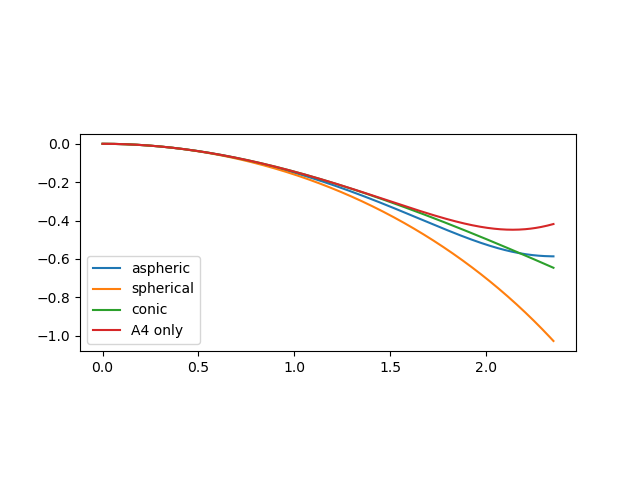

In [103]:
%matplotlib notebook

ax = pp.gca()
ax.set_aspect("equal")

pp.plot(r,z, label="aspheric")

pp.plot(r,z2, label="spherical")

pp.plot(r,z3, label="conic")

pp.plot(r,z4, label="A4 only")

pp.legend(loc="best")

# Aspheric Intersection

I dont think there's an analysic form for the solution to the aspheric profile intersection. The best plan is to find a point close to the solution using the intersection with the conic section (i.e. set all A* coeeficients to zero), then iterate to the final solution of the asperic surface using a root-finding algorithm. E.g. Newton-Raphson method.

The Newton Raphson methods requires us to find an expression for the gradient of the function w.r.t. our free parameter alpha (the fractional distance along the input ray).

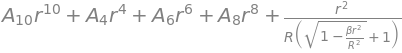

In [88]:
R, r, beta = symbols("R r beta")

A4, A6, A8, A10 = symbols("A4 A6 A8 A10")

e8 = (r**2)/(R*(1 + sympy.sqrt(1-beta*(r**2)/(R**2)) )) + A4*(r**4) + A6*(r**6) + A8*(r**8) + A10*(r**10)
e8

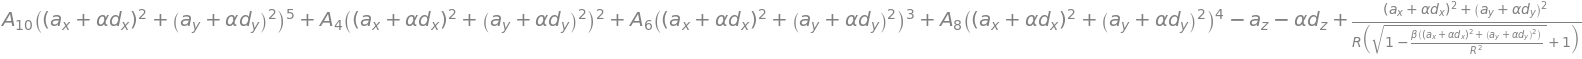

In [92]:
alpha = symbols("alpha")
ax, ay, az, dx, dy, dz = symbols("a_x a_y a_z d_x d_y d_z")

e9=e8.subs(r**2, (ax + alpha*dx)**2 + (ay + alpha*dy)**2)
e10 = e9 - (az + alpha*dz)
e10

In [96]:
print_python(e10)

A10 = Symbol('A10')
a_x = Symbol('a_x')
alpha = Symbol('alpha')
d_x = Symbol('d_x')
a_y = Symbol('a_y')
d_y = Symbol('d_y')
A4 = Symbol('A4')
A6 = Symbol('A6')
A8 = Symbol('A8')
a_z = Symbol('a_z')
d_z = Symbol('d_z')
R = Symbol('R')
beta = Symbol('beta')
e = A10*((a_x + alpha*d_x)**2 + (a_y + alpha*d_y)**2)**5 + A4*((a_x + alpha*d_x)**2 + (a_y + alpha*d_y)**2)**2 + A6*((a_x + alpha*d_x)**2 + (a_y + alpha*d_y)**2)**3 + A8*((a_x + alpha*d_x)**2 + (a_y + alpha*d_y)**2)**4 - a_z - alpha*d_z + ((a_x + alpha*d_x)**2 + (a_y + alpha*d_y)**2)/(R*(sqrt(1 - beta*((a_x + alpha*d_x)**2 + (a_y + alpha*d_y)**2)/R**2) + 1))


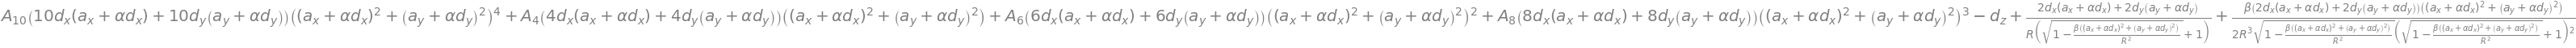

In [97]:
e11 = e10.diff(alpha)
e11

In [98]:
print_python(e11)

A10 = Symbol('A10')
d_x = Symbol('d_x')
a_x = Symbol('a_x')
alpha = Symbol('alpha')
d_y = Symbol('d_y')
a_y = Symbol('a_y')
A4 = Symbol('A4')
A6 = Symbol('A6')
A8 = Symbol('A8')
d_z = Symbol('d_z')
R = Symbol('R')
beta = Symbol('beta')
e = A10*(10*d_x*(a_x + alpha*d_x) + 10*d_y*(a_y + alpha*d_y))*((a_x + alpha*d_x)**2 + (a_y + alpha*d_y)**2)**4 + A4*(4*d_x*(a_x + alpha*d_x) + 4*d_y*(a_y + alpha*d_y))*((a_x + alpha*d_x)**2 + (a_y + alpha*d_y)**2) + A6*(6*d_x*(a_x + alpha*d_x) + 6*d_y*(a_y + alpha*d_y))*((a_x + alpha*d_x)**2 + (a_y + alpha*d_y)**2)**2 + A8*(8*d_x*(a_x + alpha*d_x) + 8*d_y*(a_y + alpha*d_y))*((a_x + alpha*d_x)**2 + (a_y + alpha*d_y)**2)**3 - d_z + (2*d_x*(a_x + alpha*d_x) + 2*d_y*(a_y + alpha*d_y))/(R*(sqrt(1 - beta*((a_x + alpha*d_x)**2 + (a_y + alpha*d_y)**2)/R**2) + 1)) + beta*(2*d_x*(a_x + alpha*d_x) + 2*d_y*(a_y + alpha*d_y))*((a_x + alpha*d_x)**2 + (a_y + alpha*d_y)**2)/(2*R**3*sqrt(1 - beta*((a_x + alpha*d_x)**2 + (a_y + alpha*d_y)**2)/R**2)*(sqrt(1 - beta*((a_x + 

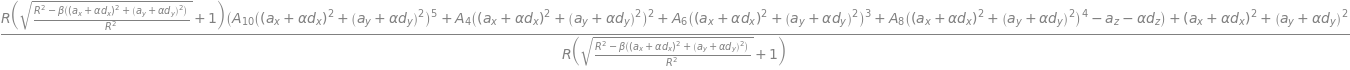

In [100]:
simplify(e10)

# Normal Vector

The normal vector for the can be obtained as

$$
\hat n = \hat z - \nabla f(x,y)
$$

where $f(x,y)$ is the surface sag function.

This is writen in terms of x,y,z components as 

$$
\hat n = \hat i_z - \frac{df}{dr} \frac{x}{r} \hat i_x - \frac{df}{dr} \frac{y}{r} \hat i_y
$$

Note, this vector will require subsequent normalisation to unit magnitude.

In [9]:
x, y, r, R, beta, A4, A6, A8, A10 = symbols("x y r R beta A4 A6 A8 A10")

f = (r**2)/(R*(1 + sympy.sqrt(1-beta*(r**2)/(R**2)) )) + A4*(r**4) + A6*(r**6) + A8*(r**8) + A10*(r**10)
f

                                              2           
     10       4       6       8              r            
A₁₀⋅r   + A₄⋅r  + A₆⋅r  + A₈⋅r  + ────────────────────────
                                    ⎛      __________    ⎞
                                    ⎜     ╱        2     ⎟
                                    ⎜    ╱      β⋅r      ⎟
                                  R⋅⎜   ╱   1 - ────  + 1⎟
                                    ⎜  ╱          2      ⎟
                                    ⎝╲╱          R       ⎠

Find gradient

In [10]:
g = f.diff(r)
g

                                                                              
        9         3         5         7             2⋅r                       
10⋅A₁₀⋅r  + 4⋅A₄⋅r  + 6⋅A₆⋅r  + 8⋅A₈⋅r  + ──────────────────────── + ─────────
                                            ⎛      __________    ⎞            
                                            ⎜     ╱        2     ⎟            
                                            ⎜    ╱      β⋅r      ⎟           ╱
                                          R⋅⎜   ╱   1 - ────  + 1⎟    3     ╱ 
                                            ⎜  ╱          2      ⎟   R ⋅   ╱  
                                            ⎝╲╱          R       ⎠        ╱   
                                                                        ╲╱    

              3                   
           β⋅r                    
──────────────────────────────────
                                 2
__________ ⎛      __________    ⎞ 
        2  ⎜     ╱        2     ⎟ 

In [11]:
sympy.simplify(g)

                                                       __________             
                                                      ╱        2              
                                                     ╱      β⋅r               
                                             2⋅r⋅   ╱   1 - ────              
                                                   ╱          2               
        9         3         5         7          ╲╱          R                
10⋅A₁₀⋅r  + 4⋅A₄⋅r  + 6⋅A₆⋅r  + 8⋅A₈⋅r  + ───────────────────────── + ────────
                                                                  2           
                                            ⎛      __________    ⎞      ⎛     
                                            ⎜     ╱        2     ⎟      ⎜     
                                            ⎜    ╱      β⋅r      ⎟      ⎜    ╱
                                          R⋅⎜   ╱   1 - ────  + 1⎟    R⋅⎜   ╱ 
                                            ⎜  ╱    